## Quantum Phase Estimation (QPE)
#### In this tutorial, we will demonstrate the capabilities of qBraid Algorithms Quantum Phase Estimation Module
Begin by importing the module from qBraid Algorithms library

In [70]:
import pyqasm
from qbraid_algorithms import qpe

To load a full QPE algorithm circuit as a PyQASM module, pass a path to the unitary U to the `load_program()` method - this shoulds be defined as a valid custom QASM gate. Additionally, pass a custom gate that prepares your eigenstate. For example,  to set the eigenstate to |1$\rangle$, simply define and pass the following .qasm file:
```
OPENQASM 3.0;
include "stdgates.inc";

gate prep q {
    x q;
}
```
Note, the gate names in both cases can be anything.

In [71]:
module = qpe.load_program("unitary.qasm", "prepare_state.qasm")

We can perform all standard [PyQASM](https://docs.qbraid.com/pyqasm/user-guide/overview) operations on the module, such as unrolling.

In [72]:
module.unroll()

Below, we display the unrolled circuits.

In [73]:
module_str = pyqasm.dumps(module)
print(module_str)

OPENQASM 3.0;
include "stdgates.inc";
qubit[4] q;
qubit[1] psi;
bit[4] b;
x psi[0];
h q[0];
h q[1];
h q[2];
h q[3];
cz q[0], psi[0];
cz q[1], psi[0];
cz q[1], psi[0];
cz q[2], psi[0];
cz q[2], psi[0];
cz q[2], psi[0];
cz q[2], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
cz q[3], psi[0];
h q[3];
rz(-0.7853981633974483) q[3];
rx(1.5707963267948966) q[3];
rz(3.141592653589793) q[3];
rx(1.5707963267948966) q[3];
rz(3.141592653589793) q[3];
cx q[3], q[2];
rz(0.7853981633974483) q[2];
rx(1.5707963267948966) q[2];
rz(3.141592653589793) q[2];
rx(1.5707963267948966) q[2];
rz(3.141592653589793) q[2];
cx q[3], q[2];
rz(-0.7853981633974483) q[2];
rx(1.5707963267948966) q[2];
rz(3.141592653589793) q[2];
rx(1.5707963267948966) q[2];
rz(3.141592653589793) q[2];
h q[2];
rz(-0.39269908169872414) q[3];
rx(1.5707963267948966) q[3];
rz(3.141592653589793) q[3];
rx(1.5707963267948966) q[3];
rz(3.141592653589793) q[3];
cx q[3]

## Using QPE in your own OpenQASM3 program
#### qBraid algorithms makes it easy to incorporate QPE into your own OpenQASM3 circuit.
To use the QPE algorithm within your own circuit, simply pass the path to your pre-defined unitary operation to the `generate_subroutine` function. The function will generate a subroutine containing QPE for your unitary within a QASM file located in your current working directory, or any path of your choice.

In [74]:
qpe.generate_subroutine("unitary.qasm")

Subroutine 'qpe' has been added to /Users/lukeandreesen/qbraid_algos/examples/QPE/qpe.qasm


To use the subroutine in your own circuit, add `include "qpe.qasm";` to your OpenQASM file, and call the `qpe` method by passing an appropriately sized register of qubits, as well as an ancilla qubit.

In [75]:
%cat qpe.qasm

OPENQASM 3.0;
include "stdgates.inc";
include "iqft.qasm";

gate custom_t q {
  z q;
}

gate CU a, b {
  ctrl @ custom_t a, b;
}
 

def qpe(qubit[4] q, qubit[1] psi) {
    int n = 4;
    for int i in [0:n-1] {
        h q[i];
    }
    for int j in [0:n-1] {
        int[16] k = 1 << j;
        for int m in [0:k-1] {
            CU q[j], psi[0];
        }
    }
    iqft(q);

}

## Running Algorithms on qBraid
Running algorithms on qBraid is simple. First, import QbraidProvider from qBraid Runtime. Visit [here](https://docs.qbraid.com/sdk/user-guide/providers/native#qbraidprovider) for more information.

### Sample Problem:  QPE with |1⟩ and the Z Gate

The **Pauli-Z** gate is defined as:

$$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

#### 1. Eigenvalues and Eigenstates
- $|0\rangle$ → eigenvalue $+1 = e^{2\pi i \cdot 0}$ → phase $\phi = 0$  
- $|1\rangle$ → eigenvalue $-1 = e^{i\pi} = e^{2\pi i \cdot \frac12}$ → phase $\phi = 0.5$

Since our input state is $|1\rangle$, we are in an **eigenstate** of $Z$ with eigenvalue $-1$.

#### 2. Phase Interpretation
In QPE, the unitary’s eigenvalue is written as:

$$
\lambda = e^{2\pi i \phi}
$$

For $\lambda = -1$:

$$
-1 = e^{i\pi} = e^{2\pi i \cdot \frac12}
$$
$$
\Rightarrow \phi = \frac12
$$

#### 3. QPE Output with 3 Counting Qubits
- $n = 3$ → precision is $2^3 = 8$ possible values  
- $\phi = 0.5$ in binary with 3 bits is:
$$
0.5 = 0.100_2
$$
- QPE measurement register will give **`100`** with probability $1$.

---

**Final result:**  
For $|1\rangle$ and $Z$, QPE perfectly returns `100` for 3 counting qubits, corresponding to a phase of **0.5**.


In [76]:
from qbraid.runtime import QbraidProvider

If you have not yet configured QbraidProvider, provide your API key.

In [77]:
# provider = QbraidProvider(api_key='API_KEY')
provider = QbraidProvider()

We'll run our program on qBraid's QIR simulator.

In [78]:
device = provider.get_device("qbraid_qir_simulator")

In [79]:
print(provider.get_devices())

[<qbraid.runtime.native.device.QbraidDevice('aws_sv1')>, <qbraid.runtime.native.device.QbraidDevice('aws_tn1')>, <qbraid.runtime.native.device.QbraidDevice('quera_aquila')>, <qbraid.runtime.native.device.QbraidDevice('aws_dm1')>, <qbraid.runtime.native.device.QbraidDevice('qbraid_qir_simulator')>, <qbraid.runtime.native.device.QbraidDevice('iqm_garnet')>, <qbraid.runtime.native.device.QbraidDevice('ionq_simulator')>, <qbraid.runtime.native.device.QbraidDevice('rigetti_ankaa_3')>, <qbraid.runtime.native.device.QbraidDevice('iqm_emerald')>]


To run the job, simply pass a QASM string to the device. If you have a PyQASM module, use `dumps` to generate a QASM string

In [80]:
module = qpe.load_program("unitary.qasm", "prepare_state.qasm", num_qubits=3)
module.unroll()
qasm_str = pyqasm.dumps(module)

In [81]:
job = device.run(qasm_str, shots=500)

Endianess is flipped for this machine - so we'll reverse the Qubit order; we also receive measurement results for the Ancilla qubit, which we'll drop here.

In [82]:
results = job.result()
counts = results.data.get_counts()
# Drop the ancilla qubit
counts = {bitstr[:-1]: count for bitstr, count in counts.items()}
# Reverse the qubit order
counts = {bitstr[::-1]: count for bitstr, count in counts.items()}

result = qpe.get_eigenvalue(counts)

Below, we show our succesfuly result of 0.5

In [83]:
print(result)

0.5


Finally, we can plot the results using qBraid Visualization.

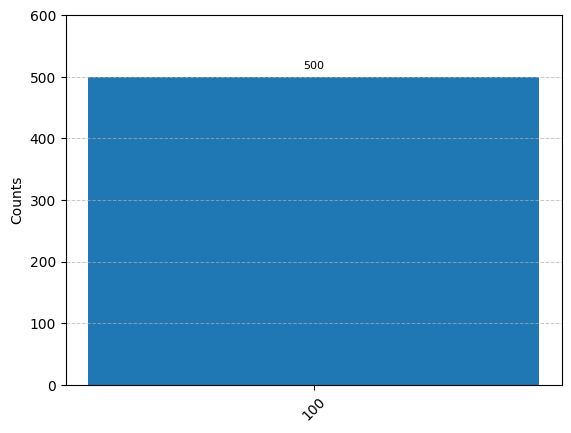

In [84]:
from qbraid.visualization import plot_histogram

plot_histogram(counts)